### Performing Multiple Linear Regression

- Now we will perform a multiple linear regression analysis to predict a fan rating based on all the information collected aboutthe movie.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,root_mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

plt.rcParams['savefig.bbox'] = "tight"
import warnings

First we proceed to load our clean dataset

In [2]:
movies = pd.read_csv(r'C:\Users\alana\Documents\TecMTY\8vo_semestre\Data_Science\movie_project\datasets\movie_DB3_clean.csv', index_col = 'Title')
movies.head()

,Genre,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4,Fans
Title,,,,,,,,,,,,
A quiet place,Horror,2018,90.0,17.0,340.939361,75.0,70.0,70.0,90.0,80.0,8.0,77.5
A quiet place Part II,Horror,2020,97.0,55.0,297.400000,72.0,70.0,80.0,40.0,60.0,6.0,69.0
Aladin (2019),Fantasy,2019,128.0,183.0,1050.693953,69.0,90.0,50.0,70.0,40.0,4.0,81.5
Alice in Wonderland,Fantasy,2010,108.0,205.0,1028.467110,64.0,80.0,40.0,60.0,50.0,7.0,78.0
American Psycho,Horror,2000,101.0,7.0,34.300000,76.0,80.0,60.0,50.0,80.0,7.0,83.5


Obtain an overall stadistic analysis

In [3]:
movies.describe()

,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4,Fans
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,2010.119760,114.922156,91.943078,469.075315,71.868263,85.808383,68.922156,67.485030,66.886228,6.874251,74.401198
std,12.244892,23.406053,69.063796,359.675748,8.393594,11.889519,17.970187,18.423354,17.177465,1.606387,14.065064
min,1942.000000,70.000000,0.636000,0.621392,51.000000,50.000000,30.000000,20.000000,30.000000,4.000000,37.000000
25%,2005.500000,97.000000,25.000000,188.160956,67.000000,80.000000,60.000000,60.000000,60.000000,6.000000,66.500000
50%,2013.000000,109.000000,85.000000,383.200000,73.000000,90.000000,70.000000,60.000000,60.000000,7.000000,76.500000
75%,2018.000000,130.000000,150.000000,701.750000,77.000000,100.000000,80.000000,80.000000,80.000000,8.000000,86.000000
max,2023.000000,180.000000,291.000000,1516.045911,92.000000,100.000000,100.000000,100.000000,100.000000,10.000000,96.000000


## Checking out the relationship between variables

First, we will study the relationship that exists between different variables. This information will help us to choose the best predictors for the model and also, to detect collinearity between predictors

In [4]:
# Calculating our correlation matrix
corr_matrix = movies.select_dtypes(include = ['float64', 'int']).corr(method = 'pearson')

# Show correlation matrix
corr_matrix

,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4,Fans
Year,1.000000,0.271848,0.240320,0.101848,-0.235057,-0.248525,-0.231292,-0.251539,-0.140845,-0.220960,-0.203538
Duration,0.271848,1.000000,0.246109,0.265925,0.314489,0.090388,0.113804,0.033490,0.138587,0.034826,0.152954
Budget,0.240320,0.246109,1.000000,0.681190,0.036448,0.168053,-0.145170,-0.052864,-0.112467,-0.044417,0.124077
Revenue,0.101848,0.265925,0.681190,1.000000,0.235804,0.210663,0.081284,0.119742,0.016870,0.106019,0.217491
Imdb,-0.235057,0.314489,0.036448,0.235804,1.000000,0.349979,0.446364,0.462201,0.523168,0.492009,0.716592
Personalrating,-0.248525,0.090388,0.168053,0.210663,0.349979,1.000000,0.139440,0.207349,0.153982,0.155175,0.310553
Critic_1,-0.231292,0.113804,-0.145170,0.081284,0.446364,0.139440,1.000000,0.412085,0.476950,0.429339,0.399988
Critic_2,-0.251539,0.033490,-0.052864,0.119742,0.462201,0.207349,0.412085,1.000000,0.369140,0.463523,0.441324
Critic_3,-0.140845,0.138587,-0.112467,0.016870,0.523168,0.153982,0.476950,0.369140,1.000000,0.483482,0.552253
Critic_4,-0.220960,0.034826,-0.044417,0.106019,0.492009,0.155175,0.429339,0.463523,0.483482,1.000000,0.478704


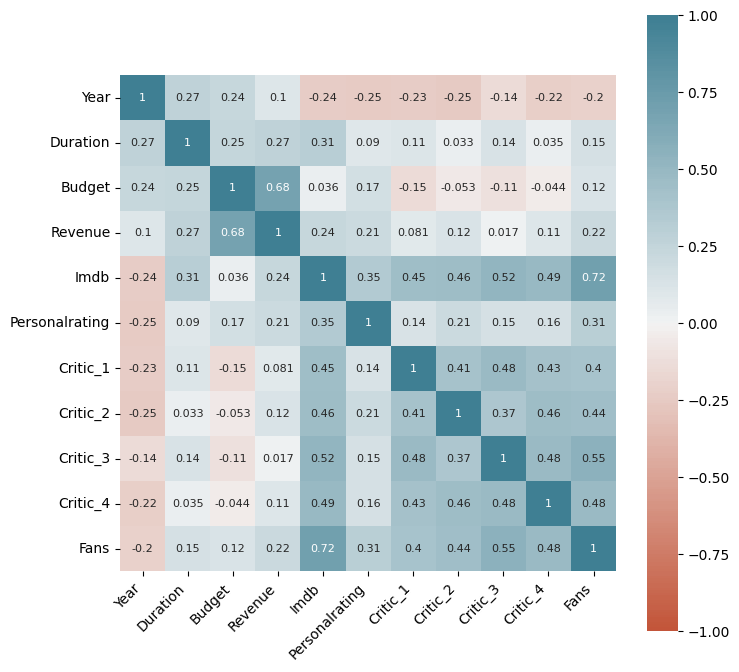

In [5]:
# Plotting our heatmap for correlation matrix
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = corr_matrix,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220,n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

To have a better understading of the distribution of the data with respect to each variable. We plot histograms to check their distributions

Text(0.5, 0.98, 'Distributions')

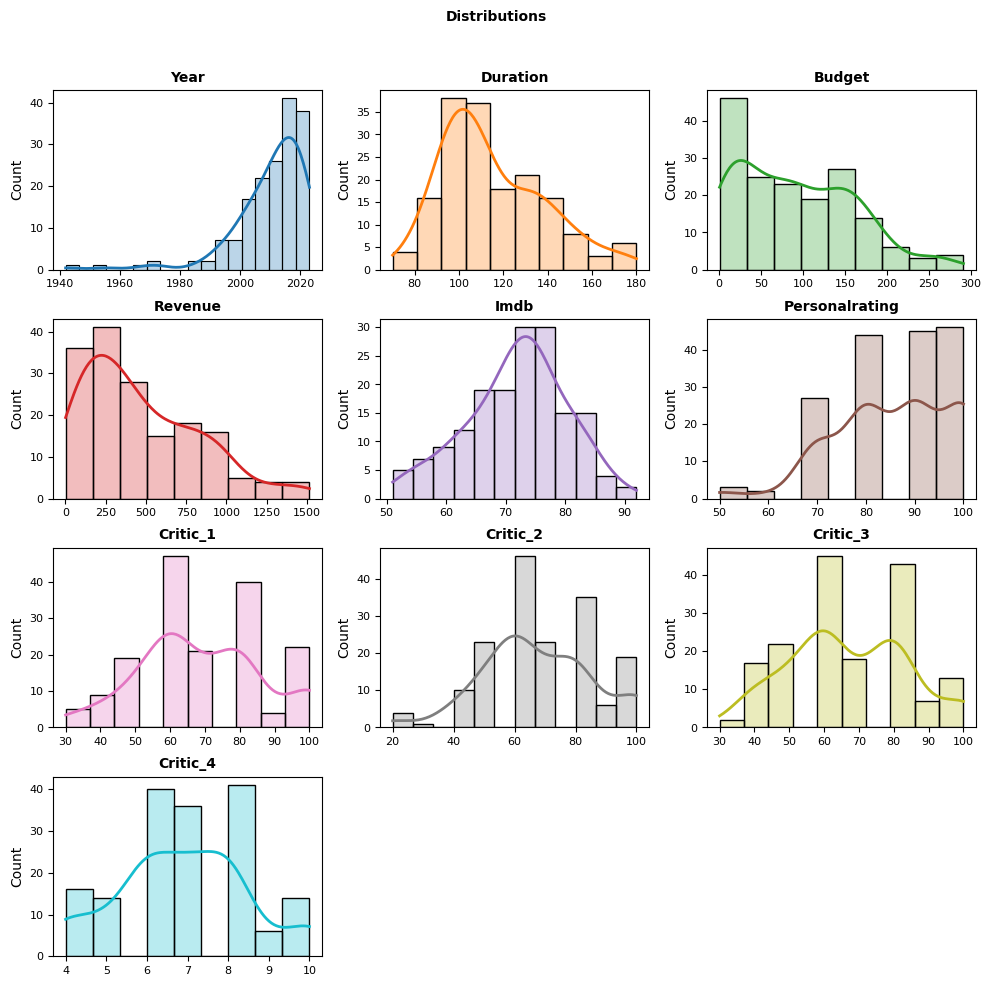

In [6]:
# Plotting the distributions for each numerical variable
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
axes = axes.flat
columnas_numeric = movies.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = movies,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


fig.delaxes(axes[10])
fig.delaxes(axes[11])
fig.tight_layout(pad=1)
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distributions', fontsize = 10, fontweight = "bold")

### Model fitting

Now, we'll fit a linear regression model with __Fans__ as the response variable while the other variables will be predictors

__Note:__ We will use Statsmodel library which provides two ways for training the model

- Giving a formula for the model and feeding it with a `DataFrame` for the training test that includes the response variable and the predictors. This is similar to the method used in **R**.

- Giving two matrices, a predictor matrix and a response matrix.

In [7]:
# Split set into training and test
X = movies.drop(columns=['Genre','Fans'])
y = movies['Fans']

In [8]:
# Checking out samples
X.head()

,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4
Title,,,,,,,,,,
A quiet place,2018,90.0,17.0,340.939361,75.0,70.0,70.0,90.0,80.0,8.0
A quiet place Part II,2020,97.0,55.0,297.400000,72.0,70.0,80.0,40.0,60.0,6.0
Aladin (2019),2019,128.0,183.0,1050.693953,69.0,90.0,50.0,70.0,40.0,4.0
Alice in Wonderland,2010,108.0,205.0,1028.467110,64.0,80.0,40.0,60.0,50.0,7.0
American Psycho,2000,101.0,7.0,34.300000,76.0,80.0,60.0,50.0,80.0,7.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 512,
                                        shuffle      = True
                                    )

In [10]:
X.columns

Index(['Year', 'Duration', 'Budget', 'Revenue', 'Imdb', 'Personalrating',
       'Critic_1', 'Critic_2', 'Critic_3', 'Critic_4'],
      dtype='object')

# Model fitting using matrices

First, we will perform a model fitting using matrices with an intercept

In [11]:
# Model fitting using matrices
# ==============================================================================
# Add a column of 1s to the predictor matrix
X_train_int = sm.add_constant(X_train, prepend=True)

In [12]:
modelm = sm.OLS(endog=y_train, exog=X_train_int,)
modelm = modelm.fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     18.96
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.40e-20
Time:                        12:41:40   Log-Likelihood:                -478.46
No. Observations:                 133   AIC:                             978.9
Df Residuals:                     122   BIC:                             1011.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -70.5855    156.539     -0.451      0.653    -380.471     239.300
Year               0.0282      0.077      0.367      0.714      -0.124       0.181
Duration          -0.0688      0.039     -1.780      0.078      -0.145       0.008
Budget             0.0339      0.017      2.015      0.046       0.001       0.067
Revenue            0.0003      0.003      0.102      0.919      -0.006       0.007
Imdb               0.9095      0.141      6.434      0.000       0.630       1.189
Personalrating     0.0403      0.072      0.557      0.579      -0.103       0.183
Critic_1           0.0726      0.059      1.239      0.218      -0.043       0.188
Critic_2           0.0619      0.053      1.179      0.241      -0.042       0.166
Critic_3           0.1817      0.060      3.017      0.003       0.062       0.301
Critic_4           0.3940      0.638      0.618      0.538      -0.868       1.657
==============================================================================
Omnibus:                        7.218   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.252
Skew:                          -0.362   Prob(JB):                       0.0161
Kurtosis:                       3.983   Cond. No.                     4.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Then, we will perform it again but now without intercept

In [13]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              909.1
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                   3.45e-110
Time:                        12:41:40   Log-Likelihood:                         -478.57
No. Observations:                 133   AIC:                                      977.1
Df Residuals:                     123   BIC:                                      1006.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Year              -0.0064      0.004     -1.513      0.133      -0.015       0.002
Duration          -0.0633      0.037     -1.732      0.086      -0.136       0.009
Budget             0.0349      0.017      2.103      0.038       0.002       0.068
Revenue            0.0003      0.003      0.092      0.927      -0.006       0.007
Imdb               0.8995      0.139      6.464      0.000       0.624       1.175
Personalrating     0.0332      0.070      0.472      0.638      -0.106       0.173
Critic_1           0.0697      0.058      1.201      0.232      -0.045       0.184
Critic_2           0.0607      0.052      1.162      0.247      -0.043       0.164
Critic_3           0.1812      0.060      3.018      0.003       0.062       0.300
Critic_4           0.3928      0.636      0.618      0.538      -0.865       1.651
==============================================================================
Omnibus:                        7.241   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.412
Skew:                          -0.355   Prob(JB):                       0.0149
Kurtosis:                       4.007   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model fitting using a formula without intercept

- Using the matrix approach to fitting the model without intercept gives the following Regression Analysis Summary

In [14]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              909.1
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                   3.45e-110
Time:                        12:41:40   Log-Likelihood:                         -478.57
No. Observations:                 133   AIC:                                      977.1
Df Residuals:                     123   BIC:                                      1006.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Year              -0.0064      0.004     -1.513      0.133      -0.015       0.002
Duration          -0.0633      0.037     -1.732      0.086      -0.136       0.009
Budget             0.0349      0.017      2.103      0.038       0.002       0.068
Revenue            0.0003      0.003      0.092      0.927      -0.006       0.007
Imdb               0.8995      0.139      6.464      0.000       0.624       1.175
Personalrating     0.0332      0.070      0.472      0.638      -0.106       0.173
Critic_1           0.0697      0.058      1.201      0.232      -0.045       0.184
Critic_2           0.0607      0.052      1.162      0.247      -0.043       0.164
Critic_3           0.1812      0.060      3.018      0.003       0.062       0.300
Critic_4           0.3928      0.636      0.618      0.538      -0.865       1.651
==============================================================================
Omnibus:                        7.241   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.412
Skew:                          -0.355   Prob(JB):                       0.0149
Kurtosis:                       4.007   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notice that the R^2 has a huge value which is closer to one. Although, the p-value for some coefficients is greater than 0.05 which means that not all the predictors are not really independent.

With this in mind, we must eliminate them one at a time.

In [15]:
X_train = X_train.drop(columns=['Critic_4'])
X_train.columns

Index(['Year', 'Duration', 'Budget', 'Revenue', 'Imdb', 'Personalrating',
       'Critic_1', 'Critic_2', 'Critic_3'],
      dtype='object')

In [16]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1015.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                   1.27e-111
Time:                        12:41:40   Log-Likelihood:                         -478.78
No. Observations:                 133   AIC:                                      975.6
Df Residuals:                     124   BIC:                                      1002.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Year              -0.0063      0.004     -1.488      0.139      -0.015       0.002
Duration          -0.0660      0.036     -1.825      0.070      -0.138       0.006
Budget             0.0351      0.017      2.121      0.036       0.002       0.068
Revenue            0.0004      0.003      0.111      0.912      -0.006       0.007
Imdb               0.9202      0.135      6.829      0.000       0.653       1.187
Personalrating     0.0313      0.070      0.447      0.656      -0.108       0.170
Critic_1           0.0753      0.057      1.317      0.190      -0.038       0.188
Critic_2           0.0681      0.051      1.341      0.182      -0.032       0.169
Critic_3           0.1887      0.059      3.217      0.002       0.073       0.305
==============================================================================
Omnibus:                        7.058   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                8.353
Skew:                          -0.336   Prob(JB):                       0.0153
Kurtosis:                       4.028   Cond. No.                         365.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X_train = X_train.drop(columns=['Personalrating'])
X_train.columns

Index(['Year', 'Duration', 'Budget', 'Revenue', 'Imdb', 'Critic_1', 'Critic_2',
       'Critic_3'],
      dtype='object')

In [18]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1149.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                   4.00e-113
Time:                        12:41:40   Log-Likelihood:                         -478.89
No. Observations:                 133   AIC:                                      973.8
Df Residuals:                     125   BIC:                                      996.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year          -0.0055      0.004     -1.435      0.154      -0.013       0.002
Duration      -0.0670      0.036     -1.862      0.065      -0.138       0.004
Budget         0.0354      0.016      2.150      0.033       0.003       0.068
Revenue        0.0004      0.003      0.135      0.893      -0.006       0.007
Imdb           0.9368      0.129      7.256      0.000       0.681       1.192
Critic_1       0.0745      0.057      1.309      0.193      -0.038       0.187
Critic_2       0.0697      0.050      1.381      0.170      -0.030       0.170
Critic_3       0.1875      0.058      3.210      0.002       0.072       0.303
==============================================================================
Omnibus:                        6.033   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                6.722
Skew:                          -0.306   Prob(JB):                       0.0347
Kurtosis:                       3.915   Cond. No.                         347.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X_train = X_train.drop(columns=['Revenue'])
X_train.columns

Index(['Year', 'Duration', 'Budget', 'Imdb', 'Critic_1', 'Critic_2',
       'Critic_3'],
      dtype='object')

In [20]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1324.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                   1.07e-114
Time:                        12:41:40   Log-Likelihood:                         -478.90
No. Observations:                 133   AIC:                                      971.8
Df Residuals:                     126   BIC:                                      992.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year          -0.0056      0.004     -1.513      0.133      -0.013       0.002
Duration      -0.0667      0.036     -1.865      0.065      -0.138       0.004
Budget         0.0369      0.012      3.051      0.003       0.013       0.061
Imdb           0.9403      0.126      7.461      0.000       0.691       1.190
Critic_1       0.0751      0.057      1.328      0.186      -0.037       0.187
Critic_2       0.0702      0.050      1.400      0.164      -0.029       0.169
Critic_3       0.1868      0.058      3.222      0.002       0.072       0.302
==============================================================================
Omnibus:                        6.191   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.948
Skew:                          -0.312   Prob(JB):                       0.0310
Kurtosis:                       3.929   Cond. No.                         331.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X_train = X_train.drop(columns=['Critic_1'])
X_train.columns

Index(['Year', 'Duration', 'Budget', 'Imdb', 'Critic_2', 'Critic_3'], dtype='object')

In [22]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1535.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                   6.27e-116
Time:                        12:41:40   Log-Likelihood:                         -479.82
No. Observations:                 133   AIC:                                      971.6
Df Residuals:                     127   BIC:                                      989.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year          -0.0052      0.004     -1.408      0.162      -0.013       0.002
Duration      -0.0652      0.036     -1.817      0.072      -0.136       0.006
Budget         0.0338      0.012      2.838      0.005       0.010       0.057
Imdb           0.9685      0.125      7.774      0.000       0.722       1.215
Critic_2       0.0838      0.049      1.703      0.091      -0.014       0.181
Critic_3       0.2103      0.055      3.799      0.000       0.101       0.320
==============================================================================
Omnibus:                        6.391   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                7.416
Skew:                          -0.307   Prob(JB):                       0.0245
Kurtosis:                       3.980   Cond. No.                         328.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X_train = X_train.drop(columns=['Year'])
X_train.columns

Index(['Duration', 'Budget', 'Imdb', 'Critic_2', 'Critic_3'], dtype='object')

In [24]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1828.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                   3.72e-117
Time:                        12:41:40   Log-Likelihood:                         -480.85
No. Observations:                 133   AIC:                                      971.7
Df Residuals:                     128   BIC:                                      986.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Duration      -0.0787      0.035     -2.266      0.025      -0.147      -0.010
Budget         0.0328      0.012      2.748      0.007       0.009       0.056
Imdb           0.8419      0.087      9.728      0.000       0.671       1.013
Critic_2       0.0814      0.049      1.648      0.102      -0.016       0.179
Critic_3       0.2193      0.055      3.973      0.000       0.110       0.329
==============================================================================
Omnibus:                        6.385   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.535
Skew:                          -0.373   Prob(JB):                       0.0381
Kurtosis:                       3.788   Cond. No.                         23.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X_train = X_train.drop(columns=['Duration'])
X_train.columns

Index(['Budget', 'Imdb', 'Critic_2', 'Critic_3'], dtype='object')

In [26]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              2212.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                   9.21e-118
Time:                        12:41:41   Log-Likelihood:                         -483.47
No. Observations:                 133   AIC:                                      974.9
Df Residuals:                     129   BIC:                                      986.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Budget         0.0242      0.012      2.108      0.037       0.001       0.047
Imdb           0.7162      0.068     10.610      0.000       0.583       0.850
Critic_2       0.0892      0.050      1.781      0.077      -0.010       0.188
Critic_3       0.2229      0.056      3.975      0.000       0.112       0.334
==============================================================================
Omnibus:                        8.919   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.038
Skew:                          -0.526   Prob(JB):                       0.0109
Kurtosis:                       3.725   Cond. No.                         16.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X_train = X_train.drop(columns=['Critic_2'])
X_train.columns

Index(['Budget', 'Imdb', 'Critic_3'], dtype='object')

In [28]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              2900.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                   7.53e-119
Time:                        12:41:41   Log-Likelihood:                         -485.08
No. Observations:                 133   AIC:                                      976.2
Df Residuals:                     130   BIC:                                      984.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Budget         0.0231      0.012      1.997      0.048       0.000       0.046
Imdb           0.7824      0.057     13.770      0.000       0.670       0.895
Critic_3       0.2434      0.055      4.400      0.000       0.134       0.353
==============================================================================
Omnibus:                       10.494   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.168
Skew:                          -0.570   Prob(JB):                      0.00376
Kurtosis:                       3.847   Cond. No.                         13.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finally, we get a R^2 value of 0.985 and all the p-values as lower than 0.05

## Confidence intervals for the coefficients 

In [29]:
# Confidence intervals for the coefficients
# ==============================================================================
modelm_noint.conf_int(alpha=0.05)

,0,1
Budget,0.000214,0.046042
Imdb,0.670002,0.894820
Critic_3,0.133977,0.352868


## Residual analysis

In [30]:
# Residual analysis
# ==============================================================================
y_train = y_train.flatten()
prediction_train = modelm_noint.predict(exog = X_train)
residues_train   = prediction_train - y_train

In [31]:
residues_train.sum()

21.766034967835786

In [32]:
residues_train.mean()

0.1636543982544044

In [33]:
residues_train.min(),residues_train.max()

(-19.61316504076713, 32.70894546852904)

## Graphs

C:\Users\alana\AppData\Local\Temp\ipykernel_43904\646976377.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [prediction_train.min(), prediction_train.max()],
C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 0.98, 'Residual analysis')

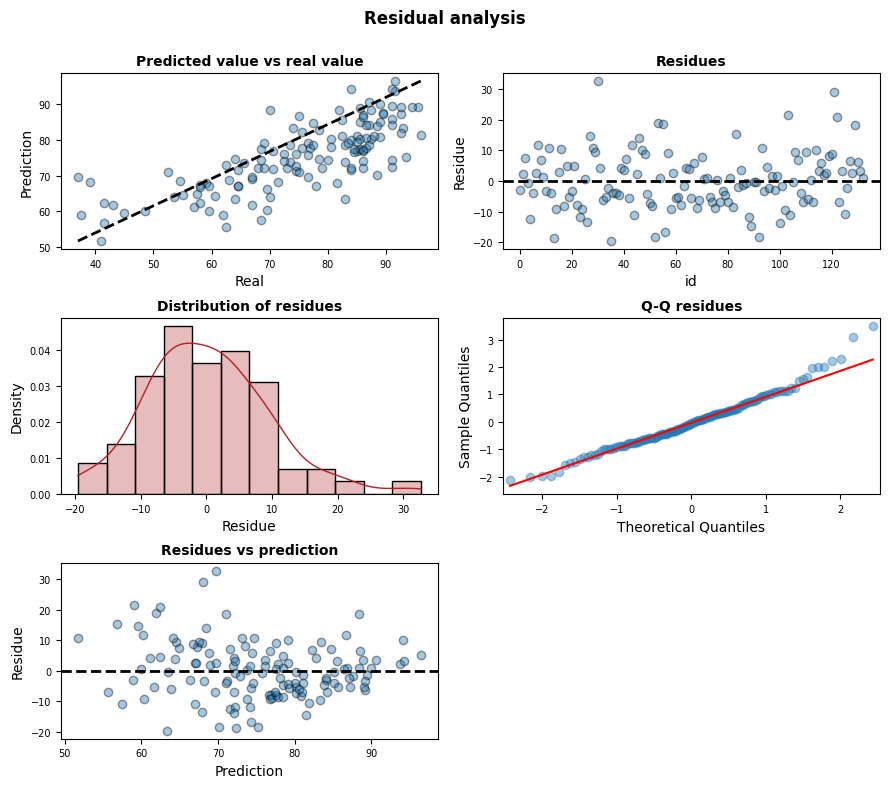

In [34]:
# Graphs
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [prediction_train.min(), prediction_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residues', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residue')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residues_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of residues', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residue")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residues_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residues', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residues vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Residue')
axes[2, 0].tick_params(labelsize = 7)

# Eliminate empty axes
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Residual analysis', fontsize = 12, fontweight = "bold")

## Normality tests

Now, we will verify if the residues follow a normal distribution using two stadistical tests:

- Shapiro-Wilk

- D'Agostino K-squared test

On both tests, the null hypothesis considers that the data follows a normal distribution. Hence, if the *$p$-value* is not smaller than the selected significance level *alpha* there is no evidence to reject the statement that the data is normally distributed.

In [35]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residues_train)
shapiro_test

ShapiroResult(statistic=0.977767379902366, pvalue=0.02808358381572893)

In [36]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residues_train)
print(f"Statistic= {k2}, p-value = {p_value}")

Statistic= 10.493867990895383, p-value = 0.0052636320040517015


The $p$-values obtained on either of the tests is much smaller than $0.05$, and therefore there is enough evidence for rejecting the null hypothesis that the residues are not normally distributed.

## Predictions

Now that we trained our model, we can make predictions for new data. We can calculate it in two ways:

In [37]:
# Predictions with 95% confidence intervals
# ==============================================================================
predictions = modelm_noint.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predictions.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
Title,,,,,,
Life of pi,84.059615,0.989184,82.102632,86.016598,65.378405,102.740825
Fast and Furious 6,77.821614,2.194458,73.480142,82.163087,58.742668,96.900561
The Purge Anarchy,64.887795,1.087760,62.735792,67.039799,46.185150,83.590441
Ice age,72.216494,1.492700,69.263366,75.169622,53.404827,91.028160


## Model error test

In [38]:
# Model error test
# ==============================================================================
#X_test = sm.add_constant(X_test, prepend=False)
predictions = modelm_noint.predict(exog = X_test[list(X_train.columns)])
rmse = root_mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions
       )
print("")
print(f"The test error (rmse) is: {rmse}")


The test error (rmse) is: 9.128242763560676


In [39]:
movies['Fans'].min(),movies['Fans'].mean(),movies['Fans'].max()

(37.0, 74.40119760479043, 96.0)

In [40]:
modelm_noint.params

Budget      0.023128
Imdb        0.782411
Critic_3    0.243422
dtype: float64

## Interpreting the results

The linear model thus generated follows the next equation:

$$
Fans = 0.0.23128 Budget + 0.782411 Imdb + 0.243422 Critic_3
$$

__R^2__ indicates that the model is able to explain 98.5% of the observed variability for the response variable. Furthermore, the *p_value* obtained in the F-test indicates that there is sufficient evidence that the variance explained by the model is greater than that of random chance.

## Making a prediction

Now, we will use our model to predict the rating of a movie that is not in the data frame

In [41]:
titles = movies.index.values.tolist()

In [42]:
'Puss in boots: The Last Wish'.capitalize()

'Puss in boots: the last wish'

In [43]:
'Kung Fu Panda 4'.capitalize() in titles or 'Puss in boots: The Last Wish'.capitalize() in titles or "Toy story 4" in titles

False

In [44]:
X_train.columns

Index(['Budget', 'Imdb', 'Critic_3'], dtype='object')

In [46]:
favorites = pd.DataFrame({'Budget': [85.0, 100.0, 200.0], 'Imdb':[63.0, 78.0, 77.0], 'Critic_3':[80.0, 100.0, 85.0]}, index = ['Kung Fu Panda 4', 'Puss in boots: The Last Wish', 'Toy story 4'])
favorites

,Budget,Imdb,Critic_3
Kung Fu Panda 4,85.0,63.0,80.0
Puss in boots: The Last Wish,100.0,78.0,100.0
Toy story 4,200.0,77.0,85.0


In [47]:
modelm_noint.predict(exog = favorites)

Kung Fu Panda 4                 70.731559
Puss in boots: The Last Wish    87.683090
Toy story 4                     85.562145
dtype: float64